# Contributors

- Alessandro Gentili


## Introduction to NLP (Natural Language Processing)
<br>
© mgr inż. Soveatin Kuntur / Winter School - Data Literacy
<br>
Warsaw, 06.02 - 10.02.2023

© Anna Wróblewska, improvements and adding more metrics, and classifiers


As we know from lecture, general pipeline of NLP is as follows:
<br>
1. Data Preprocessing
<br>
2. Data Processing
<br>
3. Output

## Data Processing

Now we come to second part of our experiment which is data processing. This task will be classification problem. Which means, we will ask our model to classify the sentiment. It is worth to mention that, you can use your clean dataset to do this part. <br>

As for example reason, teacher will show how to use sklearn packages on this part.

## Dataset Description
The sample dataset from NLTK is separated into positive and negative tweets. It contains 5000 positive tweets and 5000 negative tweets exactly. The exact match between these classes is not a coincidence. The intention is to have a balanced dataset. That does not reflect the real distributions of positive and negative classes in live Twitter streams. It is just because balanced datasets simplify the design of most computational methods that are required for sentiment analysis. However, it is better to be aware that this balance of classes is artificial.

You can download the dataset in your workspace (or in your local computer) by doing
<br>
nltk.download('twitter_samples')


In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords
import matplotlib.pyplot as plt            # library for visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS

We can load the text fields of the positive and negative tweets by using the module's `strings()` method like this:

In [ ]:
# downloads sample twitter dataset.
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [ ]:
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

To make it easier, let us used pandas dataframe

In [ ]:
# Create a dataframe from positive tweets
pos_tweet = pd.DataFrame(all_positive_tweets, columns=['Tweet'])
# Add a column to dataframe for positive sentiment value 1
pos_tweet['Sentiment'] = 1
# Create a temporary dataframe for negative tweets
neg_tweet = pd.DataFrame(all_negative_tweets, columns=['Tweet'])
# Add a column to temporary dataframe for negative sentiment value 0
neg_tweet['Sentiment'] = 0
# Combe positive and negative tweets in one single dataframe
#df = pos_tweet.append(neg_tweet, ignore_index=True)
df = pd.concat([neg_tweet, pos_tweet], ignore_index=True)

df = df.sample(frac = 1)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,Tweet,Sentiment
0,"@alexmcgraaa no I can't do it, don't have the ...",0
1,@ejay21falcon I'm a non-Filipina fan. :D #ejay...,1
2,Hey hunny @Shana_Banana_44 Enjoy the weekend :) 💕,1
3,I miss my mom :(,0
4,@owyposadas imysm :((((,0
...,...,...
9995,New bio. Bodo amat :-(,0
9996,@briannee__ I'll stay dry :) I would do that.....,1
9997,@LuciHolland @hejgordon @Edin_Game Gutted I ne...,0
9998,@maibasyony I love you much more ♡♡♡ I swear e...,0


Next, we'll print a report with the number of positive and negative tweets. It is also essential to know the data structure of the datasets

In [ ]:
# Displaying shape of dataset
print('Dataset size:',df.shape)
df.groupby('Sentiment').count()

Dataset size: (10000, 2)


,Tweet
Sentiment,
0,5000
1,5000


In [ ]:
# Splitting the dataset into train and test set
train, test = train_test_split(df,test_size = 0.1)
train

,Tweet,Sentiment
5352,@Kellipage17 Seriously?! That's amazing! #jeal...,0
9025,I'm breaking out but what's new :-),1
4588,Really struggling painting with my finger :(,0
9794,My afternoon date. &lt;3 :),1
3988,just know I know :-),1
...,...,...
9500,Breaking the habit of a lifetime... I'm about ...,0
4563,That one person. Is still very important to me...,0
5960,@_Sampath @gnanodayam @wtfex I did not mean li...,1
566,that sad moment when u r leaving in two days :(,0


In [ ]:
test

,Tweet,Sentiment
9047,"my heart is breathing for this moment in time,...",0
4130,#ff HopeHouseKids PitmanTraining WalkerSmithWa...,1
2059,@WeeklyChris Hello! ... :(,0
4110,@literalwt tyas mind to refollow me :(,0
1858,WTF is wrong with people...shooting up a movie...,0
...,...,...
3914,@practicallyhaz the bittersweetness :(,0
483,Everything and all :(,0
714,@PaulBousty thanks :),1
1014,Hi BAM ! @BarsAndMelody \nCan you follow my be...,1


Positive words


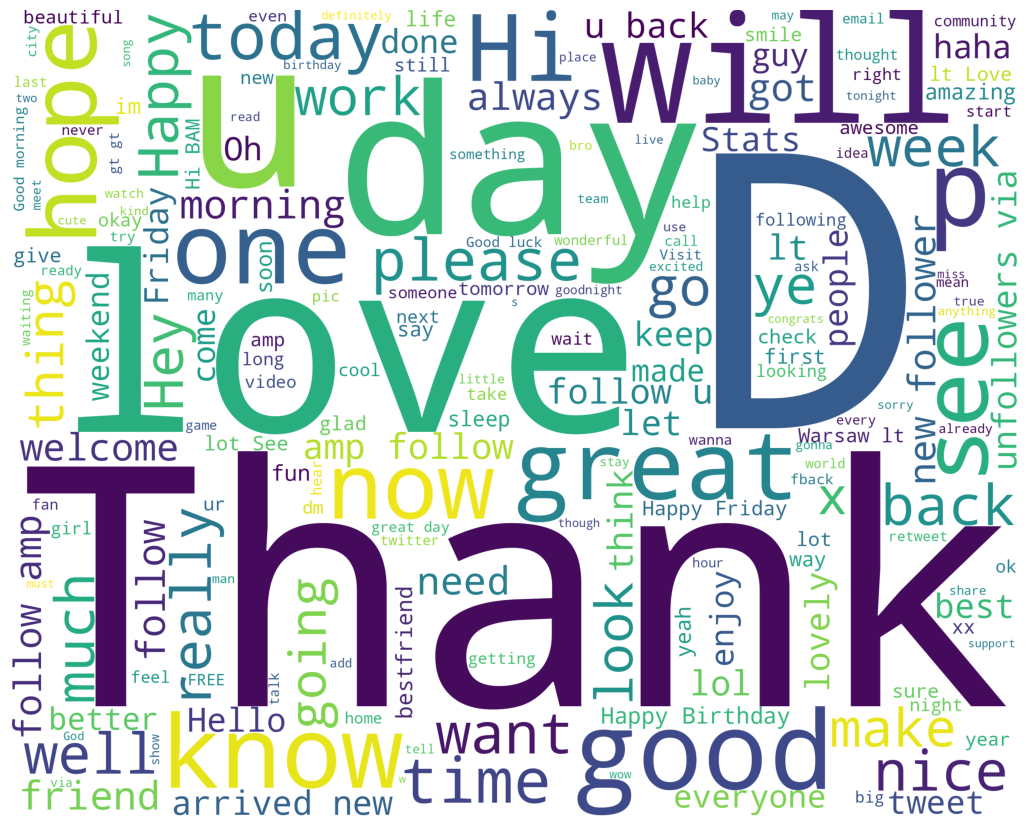

Negative words


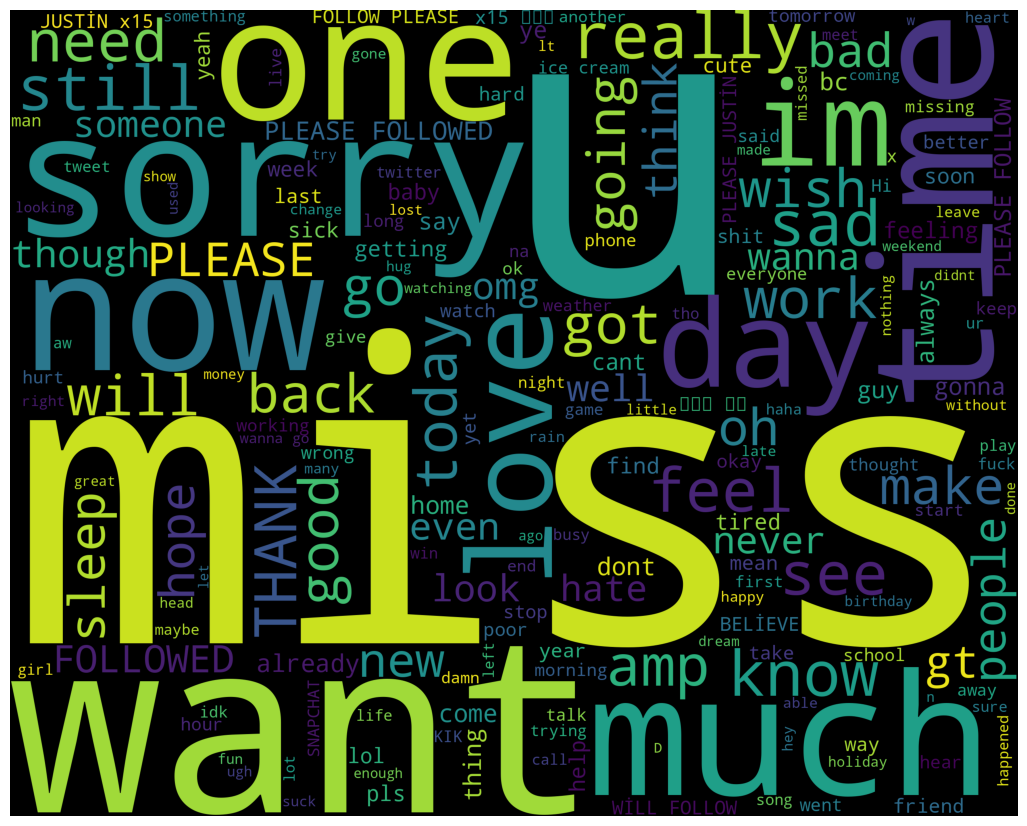

In [ ]:
train_pos = train[ train['Sentiment'] == 1]
train_pos = train_pos['Tweet']
train_neg = train[ train['Sentiment'] == 0]
train_neg = train_neg['Tweet']

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:

tweets = []
stopwords_set = set(stopwords.words("english"))

for index, row in train.iterrows():
    words_filtered = [e.lower() for e in row.Tweet.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    tweets.append((words_without_stopwords, row.Sentiment))

test_pos = test[ test['Sentiment'] == 1]
test_pos = test_pos['Tweet']
test_neg = test[ test['Sentiment'] == 0]
test_neg = test_neg['Tweet']

In [ ]:
# Extracting word features
def get_words_in_tweets(tweets):
    all = []
    for (words, sentiment) in tweets:
        all.extend(words)
    return all

def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(get_words_in_tweets(tweets))

def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

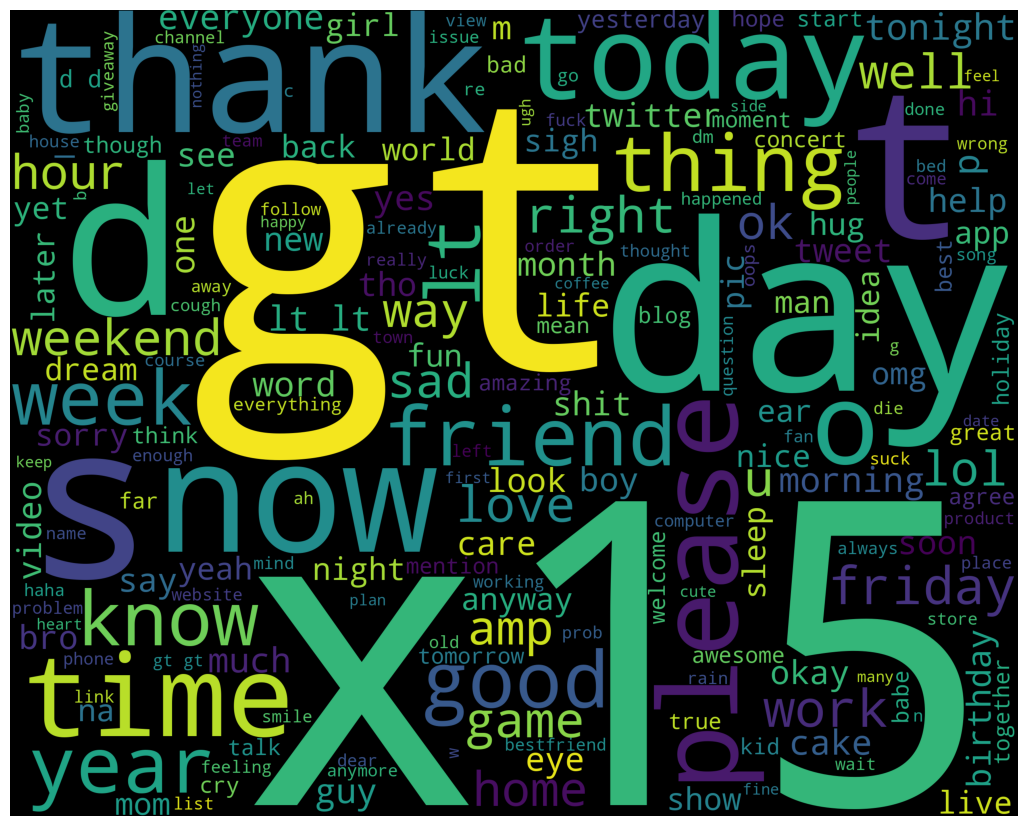

In [ ]:
wordcloud_draw(w_features)

In [ ]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier = nltk.NaiveBayesClassifier.train(training_set)

In [ ]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg:
    res =  classifier.classify(extract_features(obj.split())) # prediction on negative test
    if(res == 0):
        neg_cnt = neg_cnt + 1
for obj in test_pos:
    res =  classifier.classify(extract_features(obj.split())) # prediction on positive test
    if(res == 1):
        pos_cnt = pos_cnt + 1

print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))

[Negative]: 506/432 
[Positive]: 494/362 


## Useful links to start NLP
<br>
https://realpython.com/python-nltk-sentiment-analysis/

In [ ]:
# prompt: print confusion matrix

from sklearn.metrics import confusion_matrix

# Create lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

for obj in test['Tweet']:
    true_labels.append(test.loc[test['Tweet'] == obj, 'Sentiment'].iloc[0])
    predicted_labels.append(classifier.classify(extract_features(obj.split())))

# Calculate and print the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[432  74]
 [132 362]]


In [ ]:
# prompt: compute accuracy, F1 score, and recall, and precision

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

# calculate accuracy
accuracy_nb = accuracy_score(true_labels, predicted_labels)
print("Accuracy:", accuracy_nb)

# Calculate F1 score
f1_nb = f1_score(true_labels, predicted_labels, average='weighted')  # Use 'weighted' for multi-class problems
print("F1 Score:", f1_nb)

# Calculate recall
recall_nb = recall_score(true_labels, predicted_labels, average='weighted')
print("Recall:", recall_nb)

# Calculate precision
precision_nb = precision_score(true_labels, predicted_labels, average='weighted')
print("Precision:", precision_nb)


Accuracy: 0.794
F1 Score: 0.793159521656115
Recall: 0.794
Precision: 0.7977304313878587


In [ ]:
# prompt: based on tweets prepare training set, without nltk library

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred)
f1_lr = f1_score(y_test, y_pred, average='weighted')
recall_lr = recall_score(y_test, y_pred, average='weighted')
precision_lr = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_lr)
print("F1 Score:", f1_lr)
print("Recall:", recall_lr)
print("Precision:", precision_lr)
print("Confusion Matrix:\n", cm)


Accuracy: 0.754
F1 Score: 0.7538897055291347
Recall: 0.754
Precision: 0.7541659532855608
Confusion Matrix:
 [[391 115]
 [131 363]]


In [ ]:
# prompt: the same as above but with random forest

from sklearn.ensemble import RandomForestClassifier

# Assuming 'train' and 'test' DataFrames are already defined with 'Tweet' and 'Sentiment' columns

# Prepare the training data
X_train = train['Tweet'].tolist()
y_train = train['Sentiment'].tolist()

# Prepare the test data
X_test = test['Tweet'].tolist()
y_test = test['Sentiment'].tolist()

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer(stop_words='english')  # Use stop words for better performance

# Fit and transform the training data
X_train_vectorized = vectorizer.fit_transform(X_train)

# Transform the test data (using the same vocabulary as the training data)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest model
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred, average='weighted')
recall_rf = recall_score(y_test, y_pred, average='weighted')
precision_rf = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy_rf)
print("F1 Score:", f1_rf)
print("Recall:", recall_rf)
print("Precision:", precision_rf)
print("Confusion Matrix:\n", cm)


Accuracy: 0.688
F1 Score: 0.6852266666666667
Recall: 0.688
Precision: 0.6933537675606641
Confusion Matrix:
 [[394 112]
 [200 294]]


In [ ]:
# prompt: add sentiment analysis with Vader library

!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment scores
def get_sentiment_scores(text):
    return analyzer.polarity_scores(text)

# Apply sentiment analysis to the 'Tweet' column
train['Sentiment Scores'] = train['Tweet'].apply(get_sentiment_scores)

# Extract compound score (overall sentiment)
train['Compound Score'] = train['Sentiment Scores'].apply(lambda x: x['compound'])

# Assign sentiment labels based on compound score
train['Vader Sentiment'] = train['Compound Score'].apply(lambda x: 'Positive' if x >= 0.05 else ('Negative' if x <= -0.05 else 'Neutral'))


# Print the DataFrame with sentiment scores and labels
print(train[['Tweet', 'Sentiment Scores', 'Compound Score', 'Vader Sentiment']])

# You can now analyze the 'Vader Sentiment' column to see how the Vader library categorized the tweets.

# Example: Analyze the distribution of sentiment labels
print(train['Vader Sentiment'].value_counts())


                                                  Tweet  \
5352  @Kellipage17 Seriously?! That's amazing! #jeal...   
9025                I'm breaking out but what's new :-)   
4588       Really struggling painting with my finger :(   
9794                        My afternoon date. &lt;3 :)   
3988                               just know I know :-)   
...                                                 ...   
9500  Breaking the habit of a lifetime... I'm about ...   
4563  That one person. Is still very important to me...   
5960  @_Sampath @gnanodayam @wtfex I did not mean li...   
566     that sad moment when u r leaving in two days :(   
1234                                   @fynemo emon : )   

                                       Sentiment Scores  Compound Score  \
5352  {'neg': 0.407, 'neu': 0.321, 'pos': 0.273, 'co...         -0.3283   
9025  {'neg': 0.0, 'neu': 0.67, 'pos': 0.33, 'compou...          0.4497   
4588  {'neg': 0.545, 'neu': 0.455, 'pos': 0.0, 'comp...         -0

In [ ]:
# create a table containing the results obtained
results = []

# append the naive bayes results
results.append({
    "model": "Naive Bayes",
    "accuracy": accuracy_nb,
    "f1_score": f1_nb,
    "recall": recall_nb,
    "precision": precision_nb
})

# append the logistic regression results
results.append({
    "model": "Logistic Regression",
    "accuracy": accuracy_lr,
    "f1_score": f1_lr,
    "recall": recall_lr,
    "precision": precision_lr
})

# append the random forest results
results.append({
    "model": "Random Forest",
    "accuracy": accuracy_rf,
    "f1_score": f1_rf,
    "recall": recall_rf,
    "precision": precision_rf
})

# create the dataframe
df_results = pd.DataFrame(results)
df_results

,model,accuracy,f1_score,recall,precision
0,Naive Bayes,0.794,0.793160,0.794,0.797730
1,Logistic Regression,0.754,0.753890,0.754,0.754166
2,Random Forest,0.688,0.685227,0.688,0.693354


In [ ]:
# now we use a decision tree classifier and particular emoticons, as suggested by a student during the calss

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
import scipy.sparse as sp

# Load your dataframes 'train' and 'test' here...

# Remove @ symbol from the tweets
train['Tweet'] = train['Tweet'].str.replace('@', '', regex=True)
test['Tweet'] = test['Tweet'].str.replace('@', '', regex=True)

df = pd.concat([train, test], ignore_index=True)

# define positive symbols that identify the positive tweets (ideally)
positive_emoticons = [':)', ':"', ': )', ':P', ':D']

def contains_positive_emoticon(tweet):
    return any(emoticon in tweet for emoticon in positive_emoticons)

# Binary feature for positive emoticons
df['PositiveEmoticon'] = df['Tweet'].apply(contains_positive_emoticon)

# Additional feature: tweet length
df['TweetLength'] = df['Tweet'].apply(len)

# Vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Tweet'])

# Combine the vectorized text with features
X_combined = sp.hstack((X, df[['PositiveEmoticon', 'TweetLength']].astype(float)))

# Labels
y = df['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.1, random_state=42)

# Use DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', cm)


Accuracy: 0.909
F1 score: 0.9087827024357634
Recall: 0.909
Precision: 0.9113557575757576
Confusion Matrix:
 [[485  26]
 [ 65 424]]


In [ ]:
# add these result to the final table
new_row = {'model': 'Decision Tree with Positive Emoticons', 'accuracy': accuracy, 'f1_score': f1, 'recall': recall, 'precision': precision}
new_row_df = pd.DataFrame([new_row])
df_results = pd.concat([df_results, new_row_df], ignore_index=True)
df_results

,model,accuracy,f1_score,recall,precision
0,Naive Bayes,0.794,0.793160,0.794,0.797730
1,Logistic Regression,0.754,0.753890,0.754,0.754166
2,Random Forest,0.688,0.685227,0.688,0.693354
3,Decision Tree with Positive Emoticons,0.909,0.908783,0.909,0.911356


In [ ]:
# now we implement the word2vec embedding to the previous model
from gensim.models import Word2Vec
from scipy.sparse import csr_matrix

# Remove @ symbol from the tweets
train['Tweet'] = train['Tweet'].str.replace('@', '', regex=True)
test['Tweet'] = test['Tweet'].str.replace('@', '', regex=True)

# Concatenate train and test datasets
df = pd.concat([train, test], ignore_index=True)

# Define positive emoticons
positive_emoticons = [':)', ':"', ': )', ':P', ':D']

def contains_positive_emoticon(tweet):
    return any(emoticon in tweet for emoticon in positive_emoticons)

# Create binary feature for positive emoticons
df['PositiveEmoticon'] = df['Tweet'].apply(contains_positive_emoticon)

# Add a feature for tweet length
df['TweetLength'] = df['Tweet'].apply(len)

# Preprocess tweets for Word2Vec
tokenized_tweets = df['Tweet'].apply(lambda x: re.findall(r'\w+', x.lower()))

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_tweets, vector_size=100, window=5, min_count=1, workers=4)

# Create a function to generate average Word2Vec vectors for each tweet
def get_average_word2vec(tokens, model):
    if len(tokens) == 0:
        return np.zeros(model.vector_size)  # Return a zero vector for empty tweets
    else:
        vectors = [model.wv[word] for word in tokens if word in model.wv]
        return np.mean(vectors, axis=0) if len(vectors) > 0 else np.zeros(model.vector_size)

# Generate average Word2Vec features for all tweets
word2vec_features = np.array([get_average_word2vec(tokens, word2vec_model) for tokens in tokenized_tweets])

# Convert Word2Vec features to sparse matrix
X_word2vec = csr_matrix(word2vec_features)

# Convert PositiveEmoticon and TweetLength to a sparse matrix
emoticon_length_features = csr_matrix(df[['PositiveEmoticon', 'TweetLength']].astype(float))

# Combine sparse matrices
X_combined = sp.hstack((X_word2vec, emoticon_length_features))

# Labels
y = df['Sentiment']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.1, random_state=42)

# Use DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('F1 score:', f1)
print('Recall:', recall)
print('Precision:', precision)
print('Confusion Matrix:\n', cm)


Accuracy: 0.867
F1 score: 0.8670155636302536
Recall: 0.867
Precision: 0.86717157874526
Confusion Matrix:
 [[440  71]
 [ 62 427]]


In [ ]:
# update the final table
new_row = {'model': 'Decision Tree with Positive Emoticons and Word2Vec', 'accuracy': accuracy, 'f1_score': f1, 'recall': recall, 'precision': precision}
new_row_df = pd.DataFrame([new_row])
df_results = pd.concat([df_results, new_row_df], ignore_index=True)
df_results

,model,accuracy,f1_score,recall,precision
0,Naive Bayes,0.794,0.793160,0.794,0.797730
1,Logistic Regression,0.754,0.753890,0.754,0.754166
2,Random Forest,0.688,0.685227,0.688,0.693354
3,Decision Tree with Positive Emoticons,0.909,0.908783,0.909,0.911356
4,Decision Tree with Positive Emoticons and Word...,0.867,0.867016,0.867,0.867172
